# Fisher Discriminant Analysis

Fisher Discriminant Analysis (FDA) is a method used in statistics and machine learning to find a linear combination of features that best separates two or more classes of objects. This method is particularly useful for dimensionality reduction while preserving as much class discriminatory information as possible.

## Introduction

Let's start by considering a binary classification problem where the two classes are denoted as $\mathcal{C}_1$ and $\mathcal{C}_2$. We aim to project the data onto a line such that the separation between the projected points is maximized.

## Fisher Criterion

The Fisher criterion is defined as the ratio of the between-class variance to the within-class variance. The goal is to find the projection vector $\mathbf{w}$ that maximizes this criterion.

Given two classes, the between-class variance is defined as:

$$
S_B = (\mathbf{m}_1 - \mathbf{m}_2)(\mathbf{m}_1 - \mathbf{m}_2)^T,
$$

where $\mathbf{m}_1$ and $\mathbf{m}_2$ are the mean vectors of the two classes.

The within-class variance is defined as:

$$
S_W = S_1 + S_2,
$$

where $S_1$ and $S_2$ are the covariance matrices of the two classes, given by:

$$
S_1 = \sum_{i \in \mathcal{C}_1} (\mathbf{x}_i - \mathbf{m}_1)(\mathbf{x}_i - \mathbf{m}_1)^T,
$$

$$
S_2 = \sum_{i \in \mathcal{C}_2} (\mathbf{x}_i - \mathbf{m}_2)(\mathbf{x}_i - \mathbf{m}_2)^T.
$$

The Fisher criterion is then given by:

$$
J(\mathbf{w}) = \frac{\mathbf{w}^T S_B \mathbf{w}}{\mathbf{w}^T S_W \mathbf{w}}.
$$

## Optimal Projection Vector

To find the optimal projection vector $\mathbf{w}$, we need to maximize the Fisher criterion $J(\mathbf{w})$. This is achieved by solving the generalized eigenvalue problem:

$$
S_W^{-1} S_B \mathbf{w} = \lambda \mathbf{w}.
$$

The solution to this problem gives us the eigenvector corresponding to the largest eigenvalue of $S_W^{-1} S_B$, which is the optimal projection vector $\mathbf{w}$.


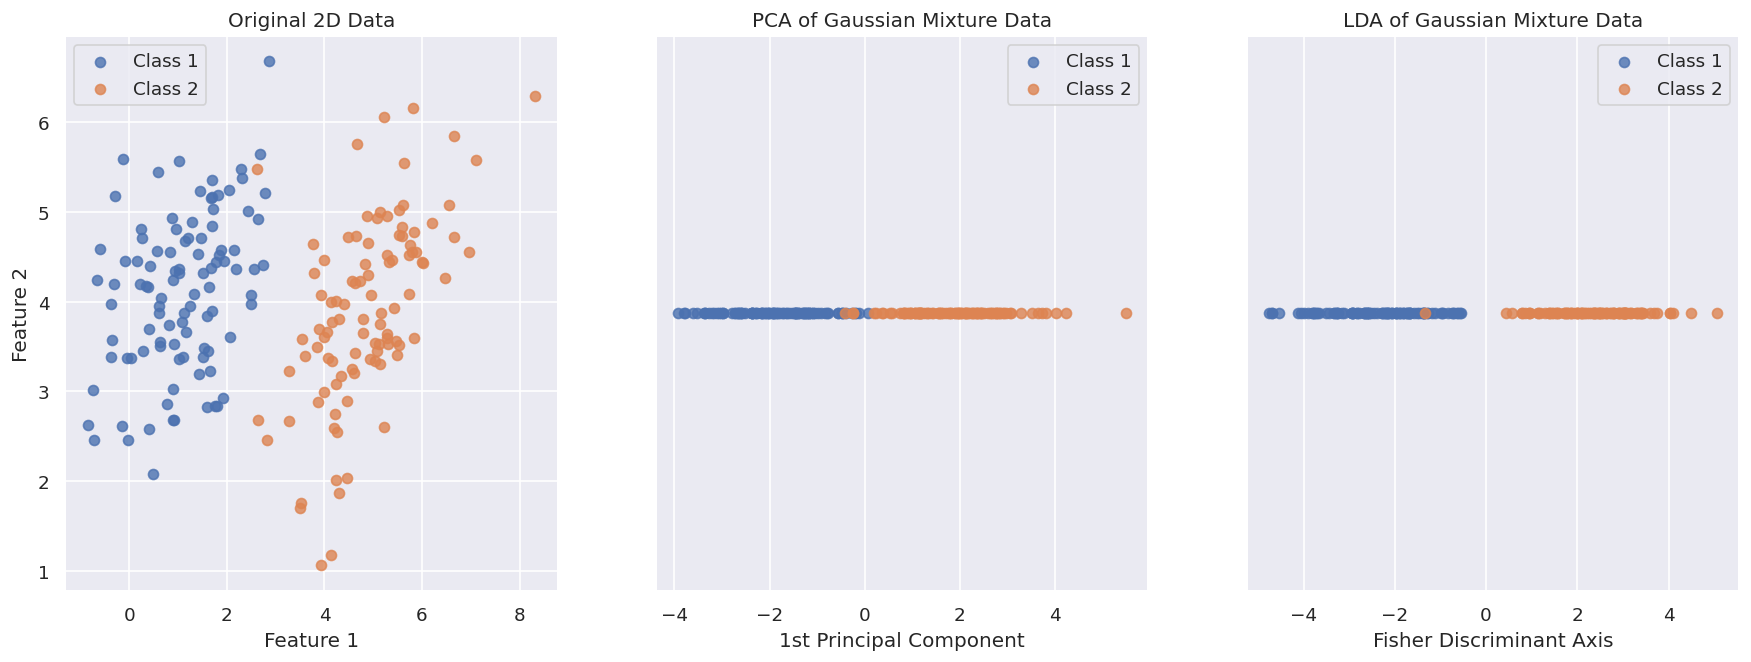

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import seaborn as sns

sns.set_theme()

# Generating synthetic 2D data using a Gaussian Mixture
np.random.seed(42)
mean1, cov1 = [1, 4], [[1, 0.5], [0.5, 1]]
mean2, cov2 = [5, 4], [[1., 0.5], [0.5, 1.]]

data1 = np.random.multivariate_normal(mean1, cov1, 100)
data2 = np.random.multivariate_normal(mean2, cov2, 100)

X = np.vstack((data1, data2))
y = np.hstack((np.zeros(100), np.ones(100)))

# Applying PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Applying LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

# Plotting
fig, (ax1, ax2, ax3)= plt.subplots(1, 3, figsize=(18, 6), dpi=120)

# Plotting the original 2D data

ax1.scatter(X[y == 0, 0], X[y == 0, 1], alpha=0.8, label="Class 1")
ax1.scatter(X[y == 1, 0], X[y == 1, 1], alpha=0.8, label="Class 2")
ax1.legend()
ax1.set_title('Original 2D Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# Plotting the PCA projection
ax2.scatter(X_pca[y == 0], np.zeros(100), alpha=0.8, label="Class 1")
ax2.scatter(X_pca[y == 1], np.zeros(100), alpha=0.8, label="Class 2")
ax2.legend()
ax2.set_title('PCA of Gaussian Mixture Data')
ax2.set_xlabel('1st Principal Component')
ax2.set_yticks([])

# Plotting the LDA projection
ax3.scatter(X_lda[y == 0], np.zeros(100), alpha=0.8, label="Class 1")
ax3.scatter(X_lda[y == 1], np.zeros(100), alpha=0.8, label="Class 2")
ax3.legend()
ax3.set_title("LDA of Gaussian Mixture Data")
ax3.set_xlabel('Fisher Discriminant Axis')
ax3.set_yticks([])

plt.show()



# Fisher Discriminant Analysis Algorithm

Given:
- $N$ training points $\{(\mathbf{x}_n, r_n)\}$ and $R$ classes
- $N_r$ denotes the number of samples in class $r$
- $s > 0$ is the Laplace smoothing factor

## Algorithm Steps

1. Compute the mean vector for each class $r$:
   $$
   \mathbf{m}_r = \frac{1}{N_r} \sum_{n:r_n=r} \mathbf{x}_n
   $$

2. Compute the within-class scatter matrix $S_W$:
   $$
   S_W = \sum_{r=1}^R \sum_{n:r_n=r} (\mathbf{x}_n - \mathbf{m}_r)(\mathbf{x}_n - \mathbf{m}_r)^T
   $$

3. Compute the between-class scatter matrix $S_B$:
   $$
   S_B = \sum_{r=1}^R N_r (\mathbf{m}_r - \mathbf{m})(\mathbf{m}_r - \mathbf{m})^T
   $$
   where $\mathbf{m}$ is the mean of all the data points:
   $$
   \mathbf{m} = \frac{1}{N} \sum_{n=1}^N \mathbf{x}_n
   $$

4. Solve the generalized eigenvalue problem to find the projection vector $\mathbf{w}$ that maximizes the Fisher criterion:
   $$
   S_W^{-1} S_B \mathbf{w} = \lambda \mathbf{w}
   $$
   The eigenvector corresponding to the largest eigenvalue $\lambda$ is the optimal projection vector $\mathbf{w}$.

5. Project the data points $\mathbf{x}_n$ onto the new axis:
   $$
   y_n = \mathbf{w}^T \mathbf{x}_n
   $$

6. Classify new points by projecting them onto the same axis and using a threshold that best separates the projected points of the two classes.

## Some issues
One of the limitations of Fisher Discriminant Analysis (FDA) is that it generates a projection matrix $\mathbf{W}$ with at most $R - 1$ columns, where $R$ is the number of classes. This is because the rank of the between-class scatter matrix $\mathbf{S}_B$ does not exceed $R - 1$. Consequently, FDA can only reduce the dimension of the feature space down to $M' = R - 1$.

For instance, if we have a feature space with $M = 100$ dimensions and we are dealing with a binary classification problem ($R = 2$), the FDA procedure will only allow us to reduce the feature dimension to one ($M' = 1$). This means that even though we start with a high-dimensional feature space, the FDA can only project the data onto a lower-dimensional subspace with a maximum dimension of $R - 1$. Thus, for binary classification, the dimension is reduced to a single dimension, but not to two or three dimensions.

## Summary
Fisher Discriminant Analysis aims to reduce the dimensionality of the data while maximizing the class separation. The key steps involve computing scatter matrices, solving an eigenvalue problem, and projecting the data onto a new axis defined by the optimal projection vector.


## Key Properties of FDA

1. FDA maximizes the ratio of between-class variance to within-class variance.
2. For binary classification, it projects data onto a single direction.
3. For multiclass problems, it can reduce dimensionality to at most $R-1$ dimensions, where $R$ is the number of classes.
4. It's a supervised method, utilizing class label information.
5. FDA does not make strong assumptions about the underlying data distribution, making it versatile for various applications.

## Comparison with LDA

While FDA and LDA are closely related, there are some key differences:

1. Assumptions: LDA assumes Gaussian distributions for the feature data, while FDA does not make this assumption.
2. Approach: LDA is derived from a probabilistic model, while FDA is based on maximizing class separability.
3. Flexibility: FDA can be more flexible in handling non-Gaussian data distributions.

## Conclusion

Fisher Discriminant Analysis is a powerful technique for both classification and dimensionality reduction. It provides a way to project high-dimensional data onto a lower-dimensional space while maximizing class separability. Its ability to work well without strong distributional assumptions makes it a versatile tool in various fields, including pattern recognition, machine learning, and data analysis.

FDA serves as a foundation for many other discriminant analysis techniques and continues to be widely used due to its effectiveness and interpretability. Understanding the mathematical foundations of FDA provides valuable insights into the principles of class separation and dimensionality reduction in machine learning and statistics.

In [1]:
import jax
import jax.numpy as jnp
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array, check_X_y
from sklearn.utils.multiclass import unique_labels
from typing import Tuple, Union

class JAXFDA(BaseEstimator, TransformerMixin):
    """
    Fisher Discriminant Analysis (FDA) using JAX for numerical computations.

    Parameters
    ----------
    n_components : int, optional (default=None)
        Number of components to keep. If None, n_components is set to min(n_classes - 1, n_features).

    Attributes
    ----------
    classes_ : ndarray of shape (n_classes,)
        The unique class labels.

    n_classes_ : int
        The number of unique classes.

    n_features_ : int
        The number of features in the input data.

    means_ : ndarray of shape (n_classes, n_features)
        The estimated means for each class.

    scalings_ : ndarray of shape (n_features, n_components)
        The scaling matrix (eigenvectors) used to project the data.

    explained_variance_ratio_ : ndarray of shape (n_components,)
        Percentage of variance explained by each of the selected components.

    Examples
    --------
    >>> from sklearn.datasets import load_iris
    >>> from sklearn.model_selection import train_test_split
    >>> iris = load_iris()
    >>> X, y = iris.data, iris.target
    >>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    >>> fda = JAXFDA(n_components=2)
    >>> fda.fit(X_train, y_train)
    >>> X_train_fda = fda.transform(X_train)
    >>> X_test_fda = fda.transform(X_test)
    """

    def __init__(self, n_components: int = None):
        self.n_components = n_components

    def fit(self, X: jnp.ndarray, y: jnp.ndarray) -> 'JAXFDA':
        """
        Fit the FDA model according to the given training data and parameters.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data.

        y : array-like of shape (n_samples,)
            Target values.

        Returns
        -------
        self : object
            Returns the instance itself.
        """
        X, y = check_X_y(X, y)
        self.classes_ = unique_labels(y)
        self.n_classes_ = len(self.classes_)
        self.n_features_ = X.shape[1]

        if self.n_components is None:
            self.n_components_ = min(self.n_classes_ - 1, self.n_features_)
        else:
            self.n_components_ = self.n_components

        self.means_ = self._compute_means(X, y)
        S_W = self._compute_within_class_scatter(X, y)
        S_B = self._compute_between_class_scatter(X)

        eigvals, eigvecs = jnp.linalg.eigh(jnp.linalg.inv(S_W) @ S_B)
        sorted_indices = jnp.argsort(eigvals)[::-1]
        self.scalings_ = eigvecs[:, sorted_indices][:, :self.n_components_]
        self.explained_variance_ratio_ = eigvals[sorted_indices][:self.n_components_] / jnp.sum(eigvals)

        return self

    def _compute_means(self, X: jnp.ndarray, y: jnp.ndarray) -> jnp.ndarray:
        """
        Compute the mean vectors for each class.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data.

        y : array-like of shape (n_samples,)
            Target values.

        Returns
        -------
        means : ndarray of shape (n_classes, n_features)
            The estimated mean vectors for each class.
        """
        means = jnp.zeros((self.n_classes_, self.n_features_))
        for idx, cls in enumerate(self.classes_):
            means = means.at[idx].set(jnp.mean(X[y == cls], axis=0))
        return means

    def _compute_within_class_scatter(self, X: jnp.ndarray, y: jnp.ndarray) -> jnp.ndarray:
        """
        Compute the within-class scatter matrix.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data.

        y : array-like of shape (n_samples,)
            Target values.

        Returns
        -------
        S_W : ndarray of shape (n_features, n_features)
            The within-class scatter matrix.
        """
        S_W = jnp.zeros((self.n_features_, self.n_features_))
        for idx, cls in enumerate(self.classes_):
            class_scatter = jnp.dot((X[y == cls] - self.means_[idx]).T, (X[y == cls] - self.means_[idx]))
            S_W = S_W + class_scatter
        return S_W

    def _compute_between_class_scatter(self, X: jnp.ndarray) -> jnp.ndarray:
        """
        Compute the between-class scatter matrix.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data.

        Returns
        -------
        S_B : ndarray of shape (n_features, n_features)
            The between-class scatter matrix.
        """
        overall_mean = jnp.mean(X, axis=0)
        S_B = jnp.zeros((self.n_features_, self.n_features_))
        for idx, cls in enumerate(self.classes_):
            n_cls = jnp.sum(self.classes_ == cls)
            mean_diff = (self.means_[idx] - overall_mean).reshape(-1, 1)
            S_B = S_B + n_cls * jnp.dot(mean_diff, mean_diff.T)
        return S_B

    def transform(self, X: jnp.ndarray) -> jnp.ndarray:
        """
        Project the data to the FDA space.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Data to transform.

        Returns
        -------
        X_new : ndarray of shape (n_samples, n_components)
            Transformed data.
        """
        X = check_array(X)
        return jnp.dot(X, self.scalings_)


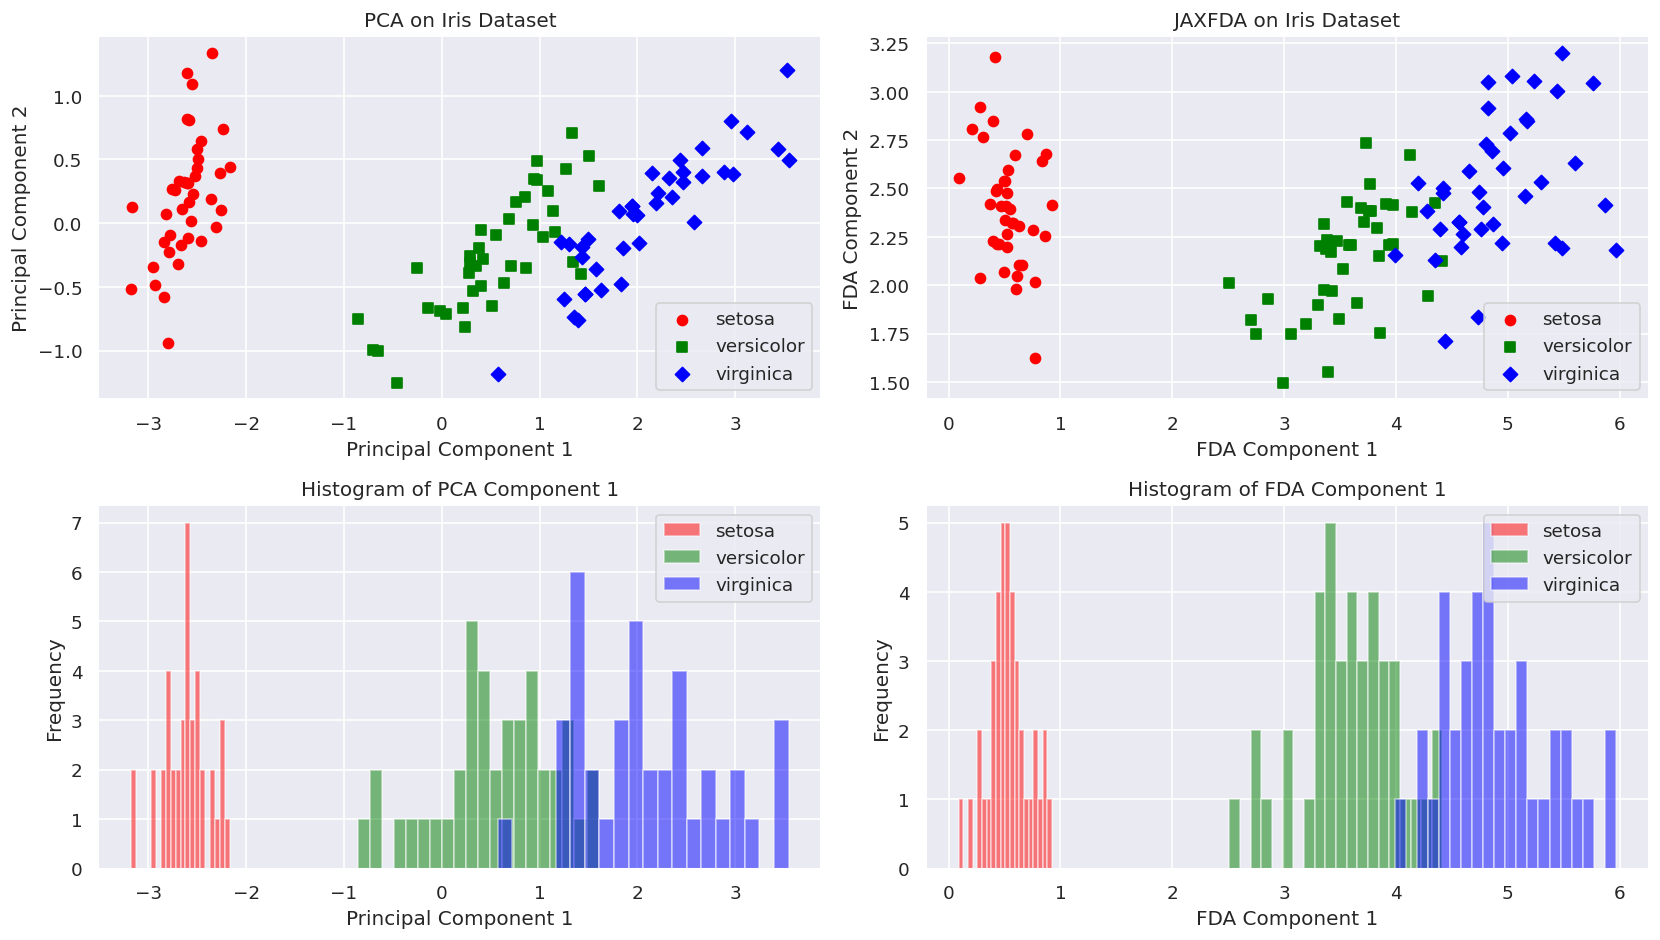

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the data using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit and transform the data using JAXFDA
fda = JAXFDA(n_components=2)
fda.fit(X_train, y_train)
X_train_fda = fda.transform(X_train)
X_test_fda = fda.transform(X_test)

colors = ['red', 'green', 'blue']
markers = ['o', 's', 'D']

# Plot PCA results
fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(14, 8), dpi=120)

for idx, label in enumerate(iris.target_names):
    ax1.scatter(X_train_pca[y_train == idx, 0], X_train_pca[y_train == idx, 1],
                color=colors[idx], marker=markers[idx], label=label)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_title('PCA on Iris Dataset')
ax1.legend()


# Plot JAXFDA results
for idx, label in enumerate(iris.target_names):
    ax2.scatter(X_train_fda[y_train == idx, 0], X_train_fda[y_train == idx, 1],
                color=colors[idx], marker=markers[idx], label=label)
ax2.set_xlabel('FDA Component 1')
ax2.set_ylabel('FDA Component 2')
ax2.set_title('JAXFDA on Iris Dataset')
ax2.legend()

# Plot histograms of the first PCA projection
for idx, label in enumerate(iris.target_names):
    ax3.hist(X_train_pca[y_train == idx, 0], bins=20, alpha=0.5, color=colors[idx], label=label)
ax3.set_xlabel('Principal Component 1')
ax3.set_ylabel('Frequency')
ax3.set_title('Histogram of PCA Component 1')
ax3.legend()

# Plot histograms of the first FDA projection
for idx, label in enumerate(iris.target_names):
    ax4.hist(X_train_fda[y_train == idx, 0], bins=20, alpha=0.5, color=colors[idx], label=label)
ax4.set_xlabel('FDA Component 1')
ax4.set_ylabel('Frequency')
ax4.set_title('Histogram of FDA Component 1')
ax4.legend()


plt.tight_layout()
plt.show()
